<a href="https://colab.research.google.com/github/zyberg2091/HacktoberFest2020-Contributions/blob/master/Machine%20Learning%20Projects/flight%20delay%20prediction/flight_delay_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [ ]:
df=pd.read_csv('FlightData.csv')   #Importing the dataset

In [ ]:
#Watching the Dataset in DataFrame
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,14747,SEA,1905,1907.0,2.0,0.0,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,13487,MSP,1345,1344.0,-1.0,0.0,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,14747,SEA,940,942.0,2.0,0.0,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,13487,MSP,819,820.0,1.0,0.0,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,11433,DTW,2300,2256.0,-4.0,0.0,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'DISTANCE', 'Unnamed: 25'],
      dtype='object')

In [ ]:
df.shape

(11231, 26)

In [ ]:
df['MONTH'].unique(),df['YEAR'].unique()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([2016]))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
YEAR                   11231 non-null int64
QUARTER                11231 non-null int64
MONTH                  11231 non-null int64
DAY_OF_MONTH           11231 non-null int64
DAY_OF_WEEK            11231 non-null int64
UNIQUE_CARRIER         11231 non-null object
TAIL_NUM               11231 non-null object
FL_NUM                 11231 non-null int64
ORIGIN_AIRPORT_ID      11231 non-null int64
ORIGIN                 11231 non-null object
DEST_AIRPORT_ID        11231 non-null int64
DEST                   11231 non-null object
CRS_DEP_TIME           11231 non-null int64
DEP_TIME               11124 non-null float64
DEP_DELAY              11124 non-null float64
DEP_DEL15              11124 non-null float64
CRS_ARR_TIME           11231 non-null int64
ARR_TIME               11116 non-null float64
ARR_DELAY              11043 non-null float64
ARR_DEL15              11043 non-null flo

In [ ]:
#Finding the sum of null values in each column
df.isnull().sum()


YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [ ]:
#Dropping out the useless columns from the DataFrame

df.drop(['Unnamed: 25'],axis=1,inplace=True)

In [ ]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,14747,SEA,1905,1907.0,2.0,0.0,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,13487,MSP,1345,1344.0,-1.0,0.0,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,14747,SEA,940,942.0,2.0,0.0,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,13487,MSP,819,820.0,1.0,0.0,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,11433,DTW,2300,2256.0,-4.0,0.0,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0


In [ ]:
df.shape

(11231, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 25 columns):
YEAR                   11231 non-null int64
QUARTER                11231 non-null int64
MONTH                  11231 non-null int64
DAY_OF_MONTH           11231 non-null int64
DAY_OF_WEEK            11231 non-null int64
UNIQUE_CARRIER         11231 non-null object
TAIL_NUM               11231 non-null object
FL_NUM                 11231 non-null int64
ORIGIN_AIRPORT_ID      11231 non-null int64
ORIGIN                 11231 non-null object
DEST_AIRPORT_ID        11231 non-null int64
DEST                   11231 non-null object
CRS_DEP_TIME           11231 non-null int64
DEP_TIME               11124 non-null float64
DEP_DELAY              11124 non-null float64
DEP_DEL15              11124 non-null float64
CRS_ARR_TIME           11231 non-null int64
ARR_TIME               11116 non-null float64
ARR_DELAY              11043 non-null float64
ARR_DEL15              11043 non-null flo

In [ ]:
#Keep the columns which are uselful for the model

df=df[['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','ORIGIN','DEST','CRS_ARR_TIME','ARR_DEL15']]
df.head()



,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,2143,0.0
1,1,1,5,DTW,MSP,1435,0.0
2,1,1,5,ATL,SEA,1215,0.0
3,1,1,5,SEA,MSP,1335,0.0
4,1,1,5,SEA,DTW,607,0.0


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 7 columns):
MONTH           11231 non-null int64
DAY_OF_MONTH    11231 non-null int64
DAY_OF_WEEK     11231 non-null int64
ORIGIN          11231 non-null object
DEST            11231 non-null object
CRS_ARR_TIME    11231 non-null int64
ARR_DEL15       11043 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 614.3+ KB


In [ ]:
#checking out again the null values in our new dataframe
df[df.isnull().values==True]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,852,NaN
179,1,10,7,MSP,DTW,1632,NaN
184,1,10,7,MSP,DTW,912,NaN
210,1,10,7,DTW,MSP,1303,NaN
478,1,22,5,SEA,JFK,723,NaN
...,...,...,...,...,...,...,...
10625,12,12,1,SEA,DTW,1655,NaN
10746,12,16,5,JFK,MSP,1824,NaN
10756,12,17,6,JFK,ATL,2212,NaN
10785,12,18,7,ATL,JFK,1743,NaN


In [ ]:
#Fill out the null values with 0,1 in the ARR_DEL15 column
#Note:I didn't try to remove the complete rows containing the null values as i didnt wanted to loose the data that maybe useful 

df.fillna(1,inplace=True)

[Text(0, 0.5, 'No. of Flights on time'), Text(0.5, 0, 'MONTH')]

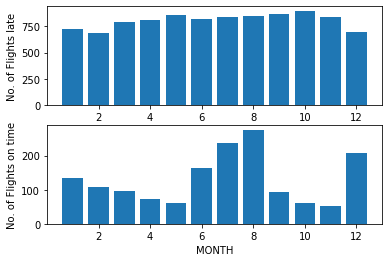

In [ ]:
#visualizing ARR_DEL15 column
fig, axs = plt.subplots(2)

df2=df[df['ARR_DEL15']==0]
Y=[len(df2[df2['MONTH']==i]) for i in df2['MONTH'].unique()]
axs[0].bar(df['MONTH'].unique(),Y)
axs[0].set(xlabel='MONTH', ylabel='No. of Flights late')


df2=df[df['ARR_DEL15']==1]
Y=[len(df2[df2['MONTH']==i]) for i in df2['MONTH'].unique()]
axs[1].bar(df['MONTH'].unique(),Y)
axs[1].set(xlabel='MONTH', ylabel='No. of Flights on time')




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 7 columns):
MONTH           11231 non-null int64
DAY_OF_MONTH    11231 non-null int64
DAY_OF_WEEK     11231 non-null int64
ORIGIN          11231 non-null object
DEST            11231 non-null object
CRS_ARR_TIME    11231 non-null int64
ARR_DEL15       11231 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 614.3+ KB


In [ ]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,2143,0.0
1,1,1,5,DTW,MSP,1435,0.0
2,1,1,5,ATL,SEA,1215,0.0
3,1,1,5,SEA,MSP,1335,0.0
4,1,1,5,SEA,DTW,607,0.0


In [ ]:
#feature scaling
df['CRS_ARR_TIME']=(df['CRS_ARR_TIME']/100).astype(int)   #Feature Scaling is required for training our model to get more accurate results

In [ ]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,21,0.0
1,1,1,5,DTW,MSP,14,0.0
2,1,1,5,ATL,SEA,12,0.0
3,1,1,5,SEA,MSP,13,0.0
4,1,1,5,SEA,DTW,6,0.0


In [ ]:
df['ORIGIN'].unique(),df['DEST'].unique()

(array(['ATL', 'DTW', 'SEA', 'MSP', 'JFK'], dtype=object),
 array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object))

In [ ]:
df=pd.get_dummies(df,columns=['ORIGIN','DEST'])

In [ ]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,21,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,14,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,12,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,13,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,6,0.0,0,0,0,0,1,0,1,0,0,0


In [ ]:
df.shape

(11231, 15)

In [ ]:
#bulding machine learning model
x=df.iloc[:,[0,1,2,3,5,6,7,8,9,10,11,12,13,14]].values
y=df.iloc[:,[4]].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
x_train.shape

NameError: ignored

In [ ]:
y_train.shape,y_test.shape

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
res=classifier.score(x_test,y_test)

In [ ]:
res    #score is not best method to check the accuracy.sometimes it is not useful

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

In [ ]:
#using ROC AUC
from sklearn.metrics import roc_auc_score
probab=classifier.predict_proba(x_test)

In [ ]:
probab[:,1]

In [ ]:
roc_auc_score(y_test, probab[:, 1])

In [ ]:
#using recall 
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)    # It may be low because falsse negatives maybe high in number

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr , _ = roc_curve(y_test, probab[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
df.columns

In [ ]:
def predict_delay(dep_date_time,origin,destination):
   from datetime import datetime
   try:
      dep_date_time_parsed = datetime.strptime(dep_date_time, '%m/%d/%Y %H:%M:%S')
   except ValueError as e:
       print('Error parsing date/time - {}'.format(e))
   
  
   date=dep_date_time_parsed.day
   month=dep_date_time_parsed.month
   day_of_week=dep_date_time_parsed.isoweekday()
   hour=dep_date_time_parsed.hour
  

   origin=origin.upper()
   destination=destination.upper()

  
   input_1=[{'MONTH':month,'DAY_OF_MONTH':
            date,'DAY_OF_WEEK':day_of_week,
           'CRS_DEP_TIME':hour,
           'ORIGIN_ATL': 1 if origin=='ATL' else 0,
           'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
           'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
           'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
           'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
           'DEST_ATL': 1 if destination == 'ATL' else 0,
           'DEST_DTW': 1 if destination == 'DTW' else 0,
           'DEST_JFK': 1 if destination == 'JFK' else 0,
           'DEST_MSP': 1 if destination == 'MSP' else 0,
           'DEST_SEA': 1 if destination == 'SEA' else 0 }]

   return classifier.predict_proba(pd.DataFrame(input_1))[0][0]   #It returns the probability of on time flight arrival

  

In [ ]:
predict_delay('10/01/2018 21:45:00', 'JFK', 'ATL')

In [ ]:
 from datetime import datetime
 dep_date_time='10/01/2018 21:45:00'
 dep_date_time_parsed = datetime.strptime(dep_date_time, '%m/%d/%Y %H:%M:%S')

In [ ]:
dep_date_time_parsed.date

In [ ]:
#visualization
x_label=['aug 1','aug 2','aug 3','aug 4']
values=(predict_delay('10/01/2018 21:45:00', 'JFK', 'ATL'),predict_delay('10/02/2018 21:45:00', 'JFK', 'ATL'),
predict_delay('10/03/2018 21:45:00', 'JFK', 'ATL'),predict_delay('10/04/2018 21:45:00', 'JFK', 'ATL'))

plt.bar(x_label,values)

